In [2]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import linprog
import matplotlib
import matplotlib.pyplot as plt
import time
from cvxopt import solvers, matrix, sparse
from scipy.optimize import root_scalar
from scipy.sparse import bsr_matrix
from scipy.stats import gamma
from scipy.stats import beta
from scipy.linalg import block_diag
import random

In [3]:
pprice_0 = np.array([30.25315744 , 30.25802709 , 30.44337154 , 39.01769247 , 41.71707568
  ,36.02953017 , 36.1098136  , 42.70951146  ,45.25493109 , 37.67158804
  ,37.86237355 , 45.47902482 , 51.02627901  ,39.93546938 , 39.4690123
  ,51.01757481 , 53.33131173 , 42.26661365  ,42.1942853   ,52.20260593
  ,55.46729745 , 43.16187681 , 42.43749894  ,54.34210958 , 57.38076318
  ,45.16589894 , 45.04450798 , 57.02426295  ,60.12040037 , 45.35478269
  ,45.22822434 , 57.46868015 , 61.8763652   ,46.18864554 , 45.39365841
  ,60.11509998 , 63.45513317 , 48.07810894  ,46.0539716  , 60.63184872
  ,65.71170065 , 48.21434328 , 48.04517991  ,63.05049593 , 67.64793159
  ,48.42213993 , 48.23407264 , 64.74725059  ,70.26787008 , 50.54989179
  ,48.40344779 , 66.49742401 , 72.63620237  ,51.12692063 , 49.09641785
  ,68.92887673 , 75.04003145 , 51.281678    ,51.04182973 , 70.23516985
  ,77.03540948 , 51.45539694 , 51.20906777  ,72.38888878 , 79.39447834
  ,53.09921063 , 51.34754445 , 74.48083078  ,81.40348308 , 54.11081706
  ,51.61860953 , 76.46628924 , 83.74886155  ,54.31352876 , 53.94643606
  ,78.39564674 , 85.79547453 , 55.20855335  ,54.24512864 , 81.32343385
  ,88.80191636 , 57.11288577 , 54.46554058 , 84.00695083 , 92.89845569
  ,57.89037208 , 57.13366243 , 87.72075839 , 96.63407045 , 60.39722962
  ,59.13874283 , 91.43075288 ,100.15801788 , 67.71558959 , 65.3506527
  ,94.82353253 ,102.39605785 , 71.14544474 , 70.70459872 , 90.09407964
  ,97.77308393])

In [4]:
pprice_1 = np.array([30.25315744 ,30.26041367 ,30.44121928 ,39.02605327 ,42.00116016 ,36.0299671
 ,36.11601673 ,44.07404646 ,45.33508503 ,38.56243856 ,38.96929697 ,47.17956362
 ,51.20688115 ,41.53185468 ,40.42559047 ,51.23131591 ,54.22636488 ,42.35318196
 ,42.28090214 ,54.12660303 ,57.17446636 ,45.04841322 ,43.39540063 ,56.35973026
 ,60.03535045 ,45.30738227 ,45.17438657 ,57.42076401 ,61.2232196  ,45.49255447
 ,45.38144383 ,60.03552509 ,63.23387441 ,48.0250463  ,45.81394612 ,60.45255537
 ,64.71942211 ,48.16723977 ,48.00858887 ,61.0385612  ,65.98337425 ,48.3294525
 ,48.14965687 ,63.13553515 ,67.94130307 ,48.48823842 ,48.30590706 ,64.52860965
 ,69.81878835 ,51.00837618 ,48.44398712 ,66.30729424 ,72.20648892 ,51.15893555
 ,49.77268742 ,68.04521518 ,74.04033441 ,51.30822684 ,51.06248723 ,69.36748474
 ,75.53777295 ,51.43104631 ,51.22851225 ,71.64395189 ,77.85953739 ,52.63610974
 ,51.36477693 ,73.00460872 ,79.59378466 ,54.18347879 ,52.7193425  ,75.50459161
 ,82.35648853 ,54.38500882 ,54.09471323 ,77.98243526 ,84.59464732 ,55.34257782
 ,54.26656054 ,79.55721779 ,86.44622081 ,57.20015551 ,54.86258893 ,82.46595305
 ,90.24274299 ,57.71548628 ,57.12249271 ,84.26106829 ,92.43831384 ,60.2109207
 ,57.78748482 ,87.00484754 ,94.76853277 ,61.32965339 ,60.16110025 ,87.7538475
 ,95.92940086 ,64.71708106 ,63.20761844 ,83.47262264 ,91.40811064])

In [5]:
pprice_2 = np.array([30.25315744 ,30.22850811 ,30.39423649 ,36.37671035 ,39.1949419  ,33.44436262
 ,33.48759201 ,42.00597282 ,42.26643282 ,36.33158239 ,36.33979052 ,42.47094641
 ,45.42415467 ,39.25175206 ,39.22154167 ,45.47831945 ,48.27195729 ,40.11499496
 ,39.47075012 ,48.27686586 ,51.07740891 ,42.21283726 ,42.15364706 ,51.04344277
 ,51.64165289 ,42.44696681 ,42.38039974 ,51.38684715 ,54.21928882 ,45.06397331
 ,43.82712123 ,54.01612819 ,54.93164705 ,45.22716431 ,45.13920997 ,54.34991965
 ,57.27991743 ,45.39886928 ,45.29795646 ,56.39532761 ,59.2085556  ,46.98510103
 ,45.4419601  ,57.29660877 ,60.38104589 ,48.13023095 ,48.00296003 ,58.61457385
 ,62.9829892  ,48.32698975 ,48.17693705 ,60.32474843 ,64.04442632 ,48.47441266
 ,48.32085015 ,62.46774818 ,66.27432    ,51.0272499  ,48.46256699 ,63.42140807
 ,68.72237727 ,51.18383462 ,50.63630284 ,65.97432696 ,70.21071104 ,51.32489452
 ,51.12269274 ,66.60717274 ,72.34918497 ,51.45965292 ,51.29133328 ,69.21553036
 ,75.00702047 ,53.62909983 ,51.43423416 ,71.32000046 ,77.13256673 ,54.2288971
 ,53.58137394 ,72.74278763 ,79.18084751 ,54.49889821 ,54.23869815 ,75.81403408
 ,83.37011519 ,57.10041537 ,54.48473867 ,78.19351927 ,86.61882571 ,57.45578297
 ,57.12812887 ,80.881326   ,89.53515792 ,58.38393488 ,57.32598047 ,81.3678524
 ,90.03538836 ,61.40292047 ,60.46934496 ,78.59340579 ,86.35564622])

In [25]:
pprice_3 = np.array([30.25315744 ,30.24830087 ,31.06998975 ,37.3349939  ,39.32205353 ,36.00696972
 ,36.06945638 ,42.0893439  ,42.30510339 ,36.48069443 ,36.47767191 ,44.71876833
 ,45.46912963 ,39.40254958 ,39.37391083 ,48.03168352 ,48.41482658 ,42.15482383
 ,42.11436601 ,48.47901547 ,51.31179279 ,42.43464138 ,42.38292295 ,51.22950127
 ,53.80182774 ,45.06300491 ,44.91431852 ,52.64867608 ,54.45800033 ,45.27736841
 ,45.19424367 ,54.30149066 ,57.1835588  ,46.03368213 ,45.40407179 ,56.55845698
 ,58.00888365 ,48.07738017 ,47.72904557 ,57.34600192 ,60.27814405 ,48.23679792
 ,48.1383052  ,57.86153719 ,62.02354329 ,48.37232229 ,48.2478438  ,60.10264116
 ,63.43019877 ,49.67145466 ,48.4140527  ,60.6166822  ,65.88192898 ,51.08123892
 ,48.79412264 ,63.14330646 ,67.19842168 ,51.21794135 ,51.03615195 ,64.88845033
 ,69.39848973 ,51.37217027 ,51.21491416 ,66.4082672  ,72.0951386  ,52.2801405
 ,51.35874949 ,68.89678301 ,74.03446831 ,54.08041062 ,51.49573412 ,69.93129099
 ,76.11522454 ,54.2260288  ,53.75841463 ,72.06400262 ,78.0912861  ,54.31436951
 ,54.10030873 ,73.3241445  ,80.02347943 ,54.47747844 ,54.22884104 ,74.92555455
 ,82.61699291 ,56.15464979 ,54.3452194  ,76.0847788  ,84.57822822 ,57.04620155
 ,54.44738849 ,77.22546801 ,86.34829789 ,57.1103925  ,54.63031032 ,79.12384022
 ,88.18757832 ,59.27555414 ,58.33240498 ,79.52019555 ,86.39418867])

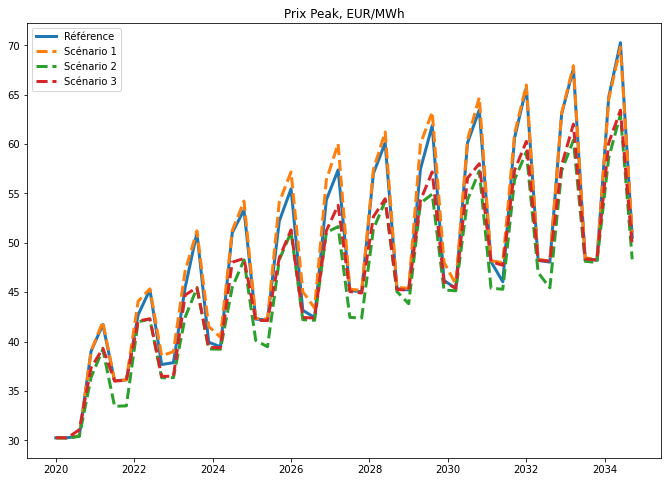

In [122]:
T = np.linspace(0,30,101)

plt.figure(figsize=(25,8))
plt.subplot(121)
plt.plot(2020+T[:50],pprice_0[:50],linewidth= 3,label='Référence')
plt.plot(2020+T[:50],pprice_1[:50],"--",linewidth= 3,label='Scénario 1')
plt.plot(2020+T[:50],pprice_2[:50],"--",linewidth= 3,label='Scénario 2')
plt.plot(2020+T[:50],pprice_3[:50],"--",linewidth= 3,label='Scénario 3')
plt.legend()
plt.title('Prix Peak, EUR/MWh')
plt.savefig('Prix_P.pdf',format='pdf')

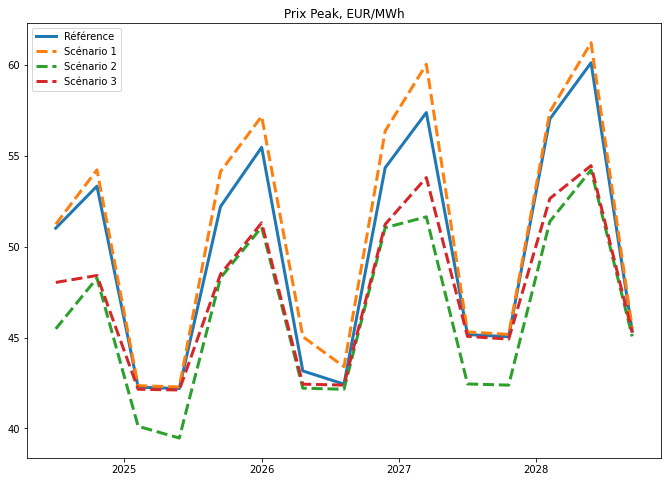

In [121]:
T = np.linspace(0,30,101)

plt.figure(figsize=(25,8))
plt.subplot(121)
plt.plot(2020+T[15:30],pprice_0[15:30],linewidth= 3,label='Référence')
plt.plot(2020+T[15:30],pprice_1[15:30],"--",linewidth= 3,label='Scénario 1')
plt.plot(2020+T[15:30],pprice_2[15:30],"--",linewidth= 3,label='Scénario 2')
plt.plot(2020+T[15:30],pprice_3[15:30],"--",linewidth= 3,label='Scénario 3')
plt.legend()
plt.title('Prix Peak, EUR/MWh')
plt.savefig('Prix_P_zoom.pdf',format='pdf')

In [9]:
opprice_0 = np.array([24.22552417 ,21.49995249 ,24.04538288 ,27.07736584 ,27.29408444 ,24.40394055
 ,24.4506355  ,30.00993558 ,30.14302428 ,27.16510205 ,27.1826552  ,30.29590191
 ,31.7762043  ,27.46434738 ,27.45963116 ,33.05732841 ,33.2166263  ,30.11079956
 ,30.09004949 ,33.24453236 ,33.39320025 ,30.25599597 ,30.22658696 ,33.39255227
 ,35.18169972 ,30.37149097 ,30.33476716 ,33.87828763 ,36.10475596 ,30.46374455
 ,30.42298459 ,36.0628705  ,36.20933232 ,33.00107798 ,30.57547662 ,36.15915062
 ,36.30247643 ,33.07749669 ,33.02641668 ,36.23868812 ,36.37770967 ,33.14162119
 ,33.08781324 ,36.30584675 ,36.46139894 ,33.21445909 ,33.16049403 ,36.3912295
 ,38.63438344 ,33.28619671 ,33.23092961 ,36.47185266 ,39.08118534 ,33.35238705
 ,33.29383382 ,38.24222204 ,39.15373004 ,33.40903134 ,33.34865213 ,39.04971087
 ,39.22196166 ,33.46162266 ,33.40134377 ,39.11943274 ,39.29179219 ,34.18716963
 ,33.45209781 ,39.18257997 ,39.35352337 ,36.01274703 ,33.51480673 ,39.24625665
 ,39.41709527 ,36.06691646 ,35.93849343 ,39.30884816 ,39.4786548  ,36.12438768
 ,36.05781587 ,39.38337886 ,41.66088307 ,36.18642229 ,36.12020093 ,39.45598148
 ,42.10935263 ,36.27462258 ,36.20844817 ,41.54712264 ,42.21825111 ,36.36253797
 ,36.3023655  ,42.0808626  ,42.3092655  ,39.03443061 ,37.76091584 ,42.14633194
 ,42.33946736 ,39.14294858 ,39.15207145 ,39.48151124 ,39.48970994,])

In [10]:
opprice_1 = np.array([24.22552417 ,21.8285524  ,24.0480156  ,27.08000041 ,27.29562225 ,24.40659129
 ,24.45296705 ,30.01177797 ,30.14544345 ,27.16764415 ,27.18597871 ,30.30100591
 ,32.14008433 ,27.46753025 ,27.46423566 ,33.06448144 ,33.22596461 ,30.11338992
 ,30.09356228 ,33.25012385 ,33.39663087 ,30.2494228  ,30.21860468 ,33.38792711
 ,34.81151202 ,30.35169023 ,30.31327132 ,33.4873555  ,36.07641963 ,30.42542546
 ,30.38455283 ,36.00720337 ,36.15013114 ,30.47367202 ,30.43439813 ,36.08226313
 ,36.21813306 ,31.61093225 ,30.47139835 ,36.10724178 ,36.25286427 ,32.88914513
 ,30.62760746 ,36.16548597 ,36.33235688 ,33.0547522  ,33.00577239 ,36.23845397
 ,36.40492591 ,33.10950338 ,33.05811614 ,36.30603094 ,36.47157086 ,33.15911377
 ,33.10526854 ,36.36562912 ,37.74834994 ,33.20956158 ,33.15035089 ,36.42111274
 ,39.02681553 ,33.25168603 ,33.19316996 ,36.48120842 ,39.09408738 ,33.29763049
 ,33.23843661 ,38.09678596 ,39.15630489 ,33.35459278 ,33.30322928 ,39.05862818
 ,39.24007331 ,33.41418372 ,33.35988184 ,39.13255184 ,39.31134517 ,33.47011441
 ,33.41203772 ,39.19189705 ,39.36930393 ,35.2127789  ,33.48498779 ,39.28418582
 ,39.47482039 ,36.06219161 ,35.72638478 ,39.33110615 ,40.57254011 ,36.16526096
 ,36.08993981 ,39.40184869 ,42.00885173 ,36.24372322 ,36.17584102 ,39.38616602
 ,41.87564805 ,36.24993856 ,36.18883734 ,38.43361775 ,38.97011954])

In [11]:
opprice_2 = np.array([24.22552417 ,21.49679667 ,24.03981157 ,27.06204087 ,27.26762514 ,24.39303904
 ,24.43835411 ,27.86274125 ,30.09356845 ,27.14944704 ,27.17114719 ,30.25096612
 ,30.46509264 ,27.45317126 ,27.45363359 ,33.00886227 ,33.15934058 ,30.10852031
 ,30.09402379 ,33.19823958 ,33.33877014 ,30.26147627 ,30.23961516 ,33.35636774
 ,33.49239193 ,30.3937646  ,30.36718471 ,33.49249627 ,36.08333207 ,30.63113461
 ,30.4694815  ,36.05585272 ,36.18819663 ,33.04750813 ,33.00979428 ,36.15645824
 ,36.29007817 ,33.13375844 ,33.09075    ,36.24270728 ,36.37501392 ,33.20777752
 ,33.16402251 ,36.32729583 ,36.46915099 ,33.28409697 ,33.23958108 ,36.39994997
 ,38.64411033 ,33.35339695 ,33.30681444 ,36.48475695 ,39.08180043 ,33.42028836
 ,33.37105983 ,39.00867664 ,39.16012937 ,33.48261347 ,33.43390068 ,39.08890993
 ,39.23937455 ,35.747261   ,33.49141577 ,39.16075313 ,39.30989957 ,36.05377886
 ,35.84876653 ,39.22658553 ,39.37804006 ,36.11111463 ,36.05602033 ,39.30028144
 ,39.44781693 ,36.16984855 ,36.11633177 ,39.36872635 ,40.13481781 ,36.24051899
 ,36.18345107 ,39.42846796 ,42.02000611 ,36.33042138 ,36.26774029 ,40.38297483
 ,42.13760093 ,36.41247177 ,36.34835616 ,42.01922846 ,42.2190503  ,36.83803347
 ,36.439434   ,42.08900324 ,42.28003092 ,37.89311891 ,36.48390095 ,42.05489419
 ,42.23155806 ,39.01643577 ,37.83256766 ,39.26790961 ,39.27454252])

In [20]:
opprice_3 = np.array([24.22552417, 21.58211791, 24.05724119, 27.11883743, 27.34509993, 24.45424804
 ,25.04755675 ,30.06463523 ,30.18869508 ,27.24136524 ,27.27117153 ,30.36852114
 ,33.04689576 ,30.03570748 ,30.04205099 ,33.15179491 ,33.30480734 ,30.253854
 ,30.24659008 ,33.36370202 ,33.90718892 ,30.42803262 ,30.41015606 ,34.81771341
 ,36.11298342 ,33.00807833 ,31.95415643 ,36.10327692 ,36.24924337 ,33.11953896
 ,33.08685487 ,36.2296956  ,36.362496   ,33.22841633 ,33.18931568 ,36.33628205
 ,36.45789075 ,33.30124625 ,33.27092937 ,36.43726788 ,39.00813112 ,33.38232442
 ,33.34748064 ,36.49188438 ,39.09316247 ,33.45052444 ,33.40332352 ,39.00905959
 ,39.18432174 ,35.03523586 ,33.48768855 ,39.10346886 ,39.25468737 ,36.04381893
 ,35.57175984 ,39.18111849 ,39.34130509 ,36.11149708 ,36.05549766 ,39.2774168
 ,39.42451138 ,36.18706494 ,36.13491095 ,39.35848014 ,39.57374664 ,36.2660293
 ,36.20504762 ,39.42804651 ,42.01518302 ,36.33400892 ,36.2716273  ,39.49163102
 ,42.09153282 ,36.39024875 ,36.32381798 ,41.58406396 ,42.14844055 ,36.42630882
 ,36.36923402 ,42.05078132 ,42.2125533  ,36.48946864 ,36.41980951 ,42.09575582
 ,42.28196459 ,37.91807149 ,36.45942863 ,42.13534105 ,42.3168197  ,39.00146432
 ,36.48877082 ,42.13232251 ,42.30938514 ,39.00087868 ,36.48592582 ,42.08426548
 ,42.25698878 ,37.31591988 ,36.46811349 ,39.28520388 ,39.27872639])

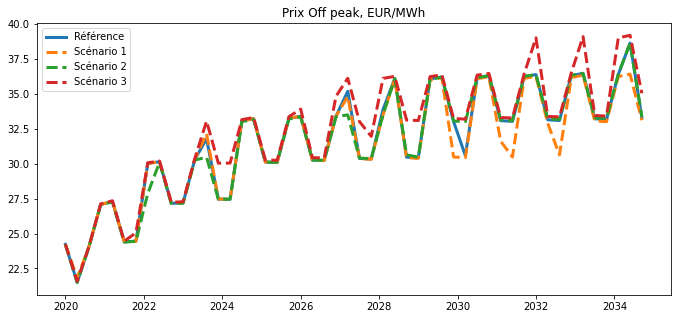

In [120]:
T = np.linspace(0,30,101)

plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(2020+T[:50],opprice_0[:50],linewidth= 3,label='Référence')
plt.plot(2020+T[:50],opprice_1[:50],"--",linewidth= 3,label='Scénario 1')
plt.plot(2020+T[:50],opprice_2[:50],"--",linewidth= 3,label='Scénario 2')
plt.plot(2020+T[:50],opprice_3[:50],"--",linewidth= 3,label='Scénario 3')
plt.legend()
plt.title('Prix Off peak, EUR/MWh')
plt.savefig('Prix_OP.pdf',format='pdf')

In [42]:
g_hist_0 = np.array([35.99985522, 35.81153703 ,35.76664226 ,35.74409445 ,35.72206639 ,35.70031735
 ,35.67873264 ,35.65725344 ,35.63584746 ,35.61449582 ,35.5931868  ,35.57191276
 ,35.55066848, 35.52945024 ,35.50825534 ,35.4870817  ,35.46592775 ,35.44479225
 ,35.42367419 ,35.40257278 ,35.38148736 ,35.36041737 ,35.33936239 ,35.31832202
 ,35.29729595 ,35.27628391 ,35.25528568 ,35.23430106 ,35.21332988 ,35.192372
 ,35.1714273  ,35.15049568 ,35.12957704 ,35.1086713  ,35.08777839 ,35.06689825
 ,35.04603083 ,35.02517608 ,35.00433395 ,34.98350442 ,34.96268744 ,34.94188299
 ,34.92109105 ,34.90031158 ,34.87954457 ,34.85879    ,34.83804784 ,34.81731809
 ,34.79660072 ,34.77589573 ,34.75520309 ,34.7345228  ,34.71385485 ,34.69319922
 ,34.6725559  ,34.65192488 ,34.63130616 ,34.61069972 ,34.59010555 ,34.56952365
 ,34.548954   ,34.5283966  ,34.50785144 ,34.48731852 ,34.46679781 ,34.44629425
 ,34.42579682 ,34.4053153  ,34.38484318 ,34.3643834  ,34.34393584 ,34.32350046
 ,34.30307725 ,34.28266619 ,34.26226728 ,34.24188051 ,34.22150588 ,34.20114337
 ,34.18079297 ,34.15919491 ,34.13824096 ,34.11797643 ,34.0977013  ,34.07290306
 ,34.05060521 ,34.03041529 ,34.01021564 ,33.97917087 ,33.95436755 ,33.93413938
 ,33.91377342 ,33.86736394 ,33.84439301 ,33.82430006 ,33.80410306 ,33.13731727
 ,33.0203142  ,33.01043741 ,32.93682005 ,30.8558763  ,28.25195114])

In [43]:
g_hist_1 = np.array([35.99985522 ,35.81153703 ,35.76664226 ,35.74409445 ,35.72206639 ,35.70031735
 ,35.67873264 ,35.65725344 ,35.63584746 ,35.61449582 ,35.5931868  ,35.57191276
 ,35.55066848 ,35.52945025 ,35.50825534 ,35.4870817  ,35.46592775 ,35.44479225
 ,35.42367419 ,35.40257278 ,35.38148735 ,35.36041737 ,35.33936239 ,35.31832202
 ,35.29729595 ,35.27628391 ,35.25528568 ,35.23430105 ,35.21332988 ,35.192372
 ,35.1714273  ,35.15049568 ,35.12957704 ,35.1086713  ,35.08777839 ,35.06689825
 ,35.04603083 ,35.02517607 ,35.00433395 ,34.98350442 ,34.96268744 ,34.94188299
 ,34.92109105 ,34.90031158 ,34.87954457 ,34.85879    ,34.83804784 ,34.81731809
 ,34.79660072 ,34.77589573 ,34.75520309 ,34.7345228  ,34.71385485 ,34.69319922
 ,34.6725559  ,34.65192488 ,34.63130616 ,34.61069972 ,34.59010555 ,34.56952365
 ,34.548954   ,34.5283966  ,34.50785144 ,34.48731851 ,34.46679781 ,34.44628932
 ,34.42579303 ,34.40530895 ,34.38483705 ,34.36437734 ,34.34392981 ,34.32349445
 ,34.30307124 ,34.28266019 ,34.26226129 ,34.24187452 ,34.22149989 ,34.20113738
 ,34.18078699 ,34.15918893 ,34.13823498 ,34.11797045 ,34.09769532 ,34.06577964
 ,34.04449556 ,34.02431232 ,34.00366317 ,33.96649728 ,33.94434933 ,33.9241198
 ,33.90379912 ,33.8615405  ,33.83861623 ,33.81826148 ,33.79767661 ,33.74518321
 ,33.72088085 ,33.70095822 ,33.68080629 ,32.64871709 ,30.82907624])

In [44]:
g_hist_2 = np.array([35.99985522 ,35.81153703, 35.76664226 ,35.74409445 ,35.72206639, 35.70031735
 ,35.67873264 ,35.65725344 ,35.63584746 ,35.61449582 ,35.5931868 , 35.57191276
 ,35.55066848, 35.52945024 ,35.50825534 ,35.4870817  ,35.46592775, 35.44479225
 ,35.42367419, 35.40257278 ,35.38148735 ,35.36041737 ,35.33936239, 35.31832202
 ,35.29729595, 35.27628391 ,35.25528568 ,35.23430105 ,35.21332987, 35.192372
 ,35.1714273 , 35.15049568 ,35.12957704 ,35.1086713  ,35.08777839, 35.06689825
 ,35.04603083, 35.02517607 ,35.00433395 ,34.98350442 ,34.96268744, 34.94188299
 ,34.92109105, 34.90031158 ,34.87954457 ,34.85879    ,34.83804784, 34.81731809
 ,34.79660072, 34.77589573 ,34.75520309 ,34.7345228  ,34.71385485, 34.69319922
 ,34.6725559 , 34.65192488 ,34.63130616 ,34.61069971 ,34.59010555, 34.56952365
 ,34.548954  , 34.5283966  ,34.50785144 ,34.48731851 ,34.4667978 , 34.44628931
 ,34.42579303, 34.40530894 ,34.38483705 ,34.36437734 ,34.34392981, 34.32349444
 ,34.30307124, 34.28266019 ,34.26226128 ,34.24187452 ,34.22149989, 34.20113738
 ,34.18078698, 34.1604487  ,34.14012252 ,34.11980844 ,34.09950644, 34.07921652
 ,34.05893868, 34.0386729  ,34.01841918 ,33.99315533 ,33.97264856, 33.95249363
 ,33.9323289 , 33.90167283 ,33.87741899 ,33.85733798 ,33.83691046, 33.78472683
 ,33.75969192, 33.73978734 ,33.71974678 ,32.68821927 ,30.89205057])

In [45]:
g_hist_3 = np.array([35.99985522 ,35.81153703 ,35.76664226 ,35.74409445 ,35.72206639 ,35.70031735
 ,35.67873264 ,35.65725344 ,35.63584746, 35.61449582 ,35.5931868  ,35.57191276
 ,35.55066848, 35.52945024 ,35.50825534, 35.4870817  ,35.46592775 ,35.44479225
 ,35.42367419, 35.40257278 ,35.38148735, 35.36041737 ,35.33936239 ,35.31832202
 ,35.29729595, 35.27628391 ,35.25528568, 35.23430105 ,35.21332988 ,35.192372
 ,35.1714273 , 35.15049568 ,35.12957704, 35.1086713  ,35.08777839 ,35.06689825
 ,35.04603083, 35.02517607 ,35.00433395, 34.98350442 ,34.96268744 ,34.94188299
 ,34.92109105, 34.90031158 ,34.87954457, 34.85879    ,34.83804784 ,34.81731809
 ,34.79660072, 34.77589573 ,34.75520309, 34.7345228  ,34.71385485 ,34.69319922
 ,34.6725559 , 34.65192488 ,34.63130616, 34.61069972 ,34.59010555 ,34.56952365
 ,34.548954  , 34.5283966  ,34.50785144, 34.48731851 ,34.46679781 ,34.44628932
 ,34.42579303, 34.40530895 ,34.38483705, 34.36437734 ,34.34392981 ,34.32349445
 ,34.30307124, 34.28266019 ,34.26226129, 34.24187452 ,34.22149989 ,34.20113738
 ,34.18078699, 34.1604487  ,34.14012252, 34.11980844 ,34.09950644 ,34.07921652
 ,34.05893868, 34.0386729  ,34.01841918, 33.99692372 ,33.97606931 ,33.95590104
 ,33.93572223, 33.91104179 ,33.88884986, 33.86875585 ,33.84865217 ,33.81775486
 ,33.79607587, 33.77608646 ,33.75606922, 33.29227577 ,31.10285928])

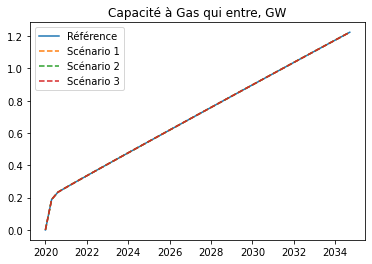

In [125]:
plt.plot(2020+T[:50],36-g_hist_0[:50],label='Référence')
plt.plot(2020+T[:50],36-g_hist_1[:50],'--', label='Scénario 1')
plt.plot(2020+T[:50],36-g_hist_2[:50],'--',label='Scénario 2')
plt.plot(2020+T[:50],36-g_hist_3[:50],'--',label='Scénario 3')
plt.legend()
plt.title('Capacité à Gas qui entre, GW')
plt.savefig('gaz_entre_capacity.pdf',format='pdf')

In [88]:
g_exit_hist_0 = np.array([31.99987131 ,21.33520466 ,20.70183634 ,20.364052 ,20.18388233 ,20.06965908
 ,20.0005201  ,19.95690866 ,19.91898878 ,19.88162266 ,19.85354081 ,19.83096077
 ,19.80881757 ,19.78407864 ,19.76441543 ,19.74705057 ,19.72910907 ,19.70947618
 ,19.69319319 ,19.67807765 ,19.66284897 ,19.64631908 ,19.63188998 ,19.61837458
 ,19.60478208 ,19.58957674 ,19.57645621 ,19.56369386 ,19.55079153 ,19.53722206
 ,19.52457761 ,19.51225405 ,19.49991104 ,19.48713194 ,19.47494454 ,19.46286101
 ,19.45081925 ,19.43856916 ,19.42665731 ,19.41480263 ,19.40296603 ,19.39103366
 ,19.3792849  ,19.36757856 ,19.35588446 ,19.34415664 ,19.33252217 ,19.32090233
 ,19.3092973  ,19.29768847 ,19.28612637 ,19.27458889 ,19.2630606  ,19.25151975
 ,19.24001896 ,19.22853442 ,19.21705331 ,19.20557177 ,19.19411279 ,19.18266433
 ,19.17122345 ,19.15978792 ,19.14836685 ,19.13695207 ,19.12554487 ,19.11414237
 ,19.10275479 ,19.09137358 ,19.07999851 ,19.06863007 ,19.05727466 ,19.04592474
 ,19.0345811  ,19.02324143 ,19.01191332 ,19.00059113 ,18.98927497 ,18.97796515
 ,18.96666411 ,18.95536804 ,18.94407718 ,18.93278926 ,18.92150881 ,18.9102273
 ,18.89894249 ,18.88763649 ,18.87633962 ,18.8650056  ,18.85352997 ,18.84184964
 ,18.82985867 ,18.8167938  ,18.80115839 ,18.78083663 ,18.76384829 ,18.74200728
 ,18.71591872 ,18.46443705 ,18.404885   ,18.36757248 ,18.32819558])

In [89]:
g_exit_hist_1 = np.array([31.99987131 ,21.30212401 ,20.38273067 ,20.01994776 ,19.83501292 ,19.68016418
 ,19.59885101 ,19.53458012 ,19.48661364 ,19.44246279 ,19.4102332  ,19.38412672
 ,19.35947997 ,19.33174137 ,19.31077991, 19.29127427 ,19.27131141 ,19.24919565
 ,19.23030882 ,19.21277625 ,19.19558508, 19.17596382 ,19.16044522 ,19.14522652
 ,19.13001265 ,19.11082676 ,19.09631865, 19.0825811  ,19.06863653 ,19.0518448
 ,19.03812258 ,19.02503722 ,19.01182802, 18.99412682 ,18.98099302 ,18.96824684
 ,18.95537183 ,18.94009446 ,18.9274434 , 18.91508731 ,18.90217578 ,18.88695431
 ,18.87425391 ,18.86205209 ,18.84976989, 18.83537963 ,18.82318544 ,18.81110833
 ,18.7989684  ,18.78556208 ,18.77300198, 18.76126272 ,18.74939822 ,18.7359214
 ,18.72384628 ,18.7119881  ,18.70036316, 18.68744701 ,18.67560396 ,18.66388663
 ,18.65213868 ,18.63984801 ,18.62826727, 18.61665872 ,18.6050338  ,18.59340098
 ,18.58182656 ,18.5704826  ,18.55908905, 18.54743326 ,18.53612113 ,18.52477675
 ,18.51343049 ,18.50208418 ,18.49088735, 18.47966331 ,18.46841003 ,18.45699082
 ,18.44579629 ,18.43458018 ,18.42331548, 18.41161429 ,18.40034632 ,18.38895949
 ,18.37716672 ,18.36435687 ,18.35176385, 18.33821521 ,18.32297373 ,18.3039404
 ,18.28382741 ,18.25854119 ,18.22603465, 18.15529871 ,18.12306191 ,18.07138227
 ,18.02946226 ,17.00823556 ,16.92785979, 16.86755171 ,16.81988713])

In [90]:
g_exit_hist_2 = np.array([31.99987131 ,25.55640093 ,25.0748937  ,24.88355826 ,24.78086361 ,24.70946441
 ,24.66885099 ,24.63486712, 24.6044738  ,24.57341649 ,24.54905227 ,24.52611945
 ,24.50272769 ,24.47804098, 24.4562877  ,24.43647637 ,24.41666953 ,24.39546487
 ,24.37620375 ,24.35817843, 24.33813946 ,24.31819975 ,24.29963482 ,24.28208559
 ,24.26319138 ,24.24378118, 24.22616597 ,24.2089048  ,24.19169426 ,24.17219841
 ,24.15437752 ,24.13702596, 24.11983348 ,24.10061251 ,24.08417533 ,24.06763882
 ,24.04943616 ,24.03197368, 24.01496864 ,23.99814422 ,23.98145014 ,23.96288531
 ,23.94559166 ,23.92862089, 23.91184714 ,23.89322717 ,23.8773328  ,23.86123556
 ,23.84513537 ,23.82517447, 23.80932403 ,23.79411776 ,23.77868    ,23.75798723
 ,23.74229977 ,23.72722467, 23.71191564 ,23.69410634 ,23.6788797  ,23.6640757
 ,23.6490891  ,23.63226714, 23.61735183 ,23.60267916 ,23.58792062 ,23.57180205
 ,23.55701534 ,23.54248555, 23.52787379 ,23.51274738 ,23.49819717 ,23.48378887
 ,23.46932346 ,23.45469435, 23.44027621 ,23.42583859 ,23.41140259 ,23.39712936
 ,23.38259869 ,23.36815612, 23.35378539 ,23.33945146 ,23.32512007 ,23.3104477
 ,23.2953027  ,23.28026111, 23.26440365 ,23.24789524 ,23.22880035 ,23.20484772
 ,23.17858785 ,23.14484578, 23.08038829 ,22.99257683 ,22.92977151 ,22.82781812
 ,22.74968562 ,21.49976801, 21.38875613 ,21.30399673 ,21.20130323])

In [91]:
g_exit_hist_3 = np.array([31.99987131 ,27.77207399 ,27.34915008 ,27.18071774 ,27.09329677 ,27.02986381
 ,26.99538494 ,26.9643337  ,26.93502283 ,26.90305482 ,26.87846344, 26.85551804
 ,26.83268035 ,26.80712601 ,26.78489237 ,26.76441865 ,26.74266341, 26.71973041
 ,26.69930711 ,26.67904653 ,26.6592964  ,26.63857322 ,26.61920656, 26.60069715
 ,26.58076267 ,26.56022552 ,26.54105833 ,26.52274406 ,26.50422853, 26.48547137
 ,26.46717769 ,26.44926921 ,26.4298656  ,26.41077473 ,26.39348026, 26.37487139
 ,26.35684712 ,26.33868374 ,26.32084853 ,26.30318325 ,26.28557216, 26.26787639
 ,26.25123323 ,26.23444358 ,26.21658092 ,26.19992382 ,26.1832038 , 26.16648235
 ,26.1497671  ,26.13352377 ,26.11755654 ,26.10151507 ,26.08568581, 26.06992971
 ,26.0542642  ,26.03870178 ,26.02317226 ,26.00764518 ,25.99214639, 25.97666932
 ,25.96120129 ,25.94573174 ,25.93027997 ,25.91484449 ,25.89941795, 25.88399351
 ,25.86858381 ,25.85318596 ,25.83779796 ,25.822416   ,25.80704806, 25.79168947
 ,25.77634007 ,25.76099639 ,25.74566567 ,25.73034514 ,25.7150336 , 25.69972936
 ,25.68429996 ,25.66867577 ,25.65268293 ,25.63606168 ,25.61744892, 25.59682651
 ,25.57331373 ,25.5459144  ,25.51772138 ,25.46967615 ,25.4058276 , 25.35385901
 ,25.28393924 ,25.2079094  ,25.09561231 ,24.85244764 ,24.7440987 , 24.60504727
 ,24.49729493 ,22.65219535 ,22.51269355 ,22.40272142 ,22.32118541])

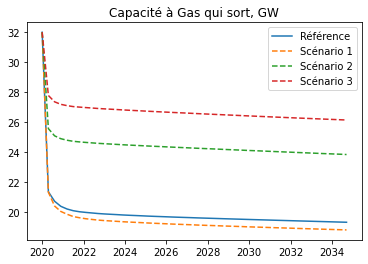

In [118]:
plt.plot(2020+T[:50],g_exit_hist_0[:50],label='Référence')
plt.plot(2020+T[:50],g_exit_hist_1[:50],'--',label='Scénario 1')
plt.plot(2020+T[:50],g_exit_hist_2[:50],'--',label='Scénario 2')
plt.plot(2020+T[:50],g_exit_hist_3[:50],'--',label='Scénario 3')
plt.legend()
plt.title('Capacité à Gas qui sort, GW')
plt.savefig('gaz_sort_capacity.pdf',format='pdf')

In [63]:
c_hist_0 = np.array([44.90047032 ,30.44729702 ,29.05296667 ,28.28644218 ,27.39071607 ,26.80852185
 ,26.21642933 ,25.86536684 ,25.43772785 ,24.96356343 ,24.65811488 ,24.36520503
 ,24.05138848 ,23.707609   ,23.49474401 ,23.28780969 ,23.05286942 ,22.70691126
 ,22.48834143 ,22.27072966 ,22.03887431 ,21.76742303 ,21.54075892 ,21.40971628
 ,21.25052457 ,20.94503653 ,20.80531904 ,20.65928615 ,20.50328532 ,20.19703502
 ,20.06300552 ,19.92514785 ,19.77827519 ,19.47448129 ,19.35020712 ,19.26566958
 ,19.10379612 ,18.88858916 ,18.7508638  ,18.67030321 ,18.575104   ,18.33696394
 ,18.19981712 ,18.12201163 ,18.03022718 ,17.70262342 ,17.62862033 ,17.55118341
 ,17.46419896 ,17.16494229 ,17.09198913 ,17.02717778 ,16.96988479 ,16.75113566
 ,16.67102972 ,16.62159808 ,16.56144832 ,16.33166285 ,16.25529072 ,16.20736408
 ,16.14545151 ,15.87207537 ,15.80322678 ,15.75849756 ,15.70283289 ,15.48299028
 ,15.41083808 ,15.36965875 ,15.32013638, 15.09081214, 14.9749398 , 14.94931039
 ,14.91585986 ,14.66080656 ,14.58987512 ,14.56431908 ,14.53221199 ,14.17232117
 ,14.08556723 ,14.06456871 ,14.0370269  ,13.70593723 ,13.62006029 ,13.60091946
 ,13.5819863 , 13.22034345, 13.13811974, 13.12255503, 13.1065538 , 12.5738081
 ,12.46889187 ,12.4556436  ,12.44278814 ,10.88890177 ,10.8000775  ,10.78745747
 ,10.77336661 , 9.03738909 , 8.50364951 , 8.30405242 , 8.06366158])

In [64]:
c_hist_1 = np.array([44.90047032 ,30.29370319 ,28.92582693 ,28.14756541 ,27.33013611 ,26.75059151
 ,26.14626704 ,25.80031059 ,25.36813738 ,24.88191103 ,24.5704058  ,24.28555935
 ,23.9686791  ,23.60279857 ,23.27459492 ,23.09088673 ,22.85708426 ,22.39896886
 ,22.1814203  ,21.97575614 ,21.74534774 ,21.27950394 ,21.06879324 ,20.86795231
 ,20.65189587 ,20.19376137 ,19.98726704 ,19.79915934 ,19.58976531 ,19.14764295
 ,18.84785417 ,18.69787069 ,18.51279675 ,18.0986613  ,17.81695848 ,17.67755366
 ,17.50599646 ,17.11270056 ,16.84607697 ,16.716325   ,16.55650686 ,15.94085956
 ,15.75136802 ,15.64171591 ,15.50511488 ,14.94443335 ,14.77247924 ,14.67314823
 ,14.5483488  ,14.0218583  ,13.85974653 ,13.76927365 ,13.65632943 ,13.17295586
 ,13.02000085 ,12.93653471 ,12.83462375 ,12.37396614 ,12.23379938 ,12.15795506
 ,12.07516712 ,11.62690297 ,11.4045942  ,11.34900504 ,11.29829214 ,10.8654237
 ,10.65427599 ,10.62129682 ,10.57282114 , 9.95835583 , 9.81180565 , 9.78396224
 , 9.74406289 , 9.19238705 , 9.06210626 , 9.03747463 , 9.00430455 , 8.47186373
 , 8.35249116 , 8.33072202 , 8.3107651  , 7.56714552 , 7.48457056 , 7.47183368
 , 7.45961226 , 6.79399738 , 6.67016875 , 6.65913497 , 6.64818928 , 5.78624627
 , 5.64968778 , 5.64059264 , 5.63243473 , 4.65809264 , 4.50532836 , 4.46718043
 , 4.41619259 , 3.43673015  ,3.26643191 , 3.19104652 , 3.09403995])

In [69]:
c_hist_2 = np.array([44.90047032 ,30.18658873 ,28.77498305 ,27.82299272 ,26.94787409 ,25.99260123
 ,25.50157216 ,24.93445917 ,24.31975294 ,23.6687677  ,23.30707765 ,22.92727222
 ,22.5173626  ,22.07292594 ,21.81348612 ,21.53239238 ,21.24170943 ,20.88873127
 ,20.59702431 ,20.31388134 ,20.01959774 ,19.68910707 ,19.39854358 ,19.11972304
 ,18.83852965 ,18.5174176  ,18.24460467 ,18.08942761 ,17.90735877 ,17.5406636
 ,17.36628423 ,17.20262778 ,17.01973377 ,16.65621011 ,16.3908617  ,16.25675398
 ,16.04250618 ,15.72441862 ,15.48377907 ,15.35967543 ,15.12059147 ,14.80627947
 ,14.58910124 ,14.47137301 ,14.3256484  ,14.01044498 ,13.79829429 ,13.69155589
 ,13.56151246 ,13.09913898 ,12.93519923 ,12.84178097 ,12.7271621  ,12.31745844
 ,12.16148951 ,12.07627417 ,11.96958594 ,11.53549878 ,11.4016049  ,11.32427634
 ,11.22686257 ,10.82860881 ,10.70506298 ,10.63382632 ,10.54357998 ,10.16447823
 ,10.04758979 , 9.9810576  , 9.89861381 , 9.53521805 , 9.33429884 , 9.28368825
 , 9.21472516 , 8.86350202 , 8.68562856 , 8.61615237 , 8.55912329 , 8.07246862
 , 7.9505945 ,  7.89578341 , 7.84729436 , 7.16178556 , 7.05161554 , 7.0251839
 , 7.00255197 , 6.40373065 , 6.28029717 , 6.25070218 , 6.16313848 , 5.444142
 , 5.30337366 , 5.22886943 , 5.13655078 , 4.5699563  , 4.35697276 , 4.3116689
 , 4.24379437 , 3.29314766  ,3.11215356 , 3.03887509 , 2.94225457])

In [68]:
c_hist_3 = np.array([44.90047032 ,29.91721691 ,27.74032372 ,26.50354778 ,25.54315608 ,24.73979449
 ,23.92775544 ,23.44648983 ,22.87070331 ,21.80605819 ,21.36801602 ,21.07047037
 ,20.69402957 ,19.98976235 ,19.64535442 ,19.32359341, 18.96161069 ,18.47094663
 ,18.11156091 ,17.77411574 ,17.42264954 ,17.03092169, 16.6873124  ,16.50479192
 ,16.2837511  ,15.82263372 ,15.48617144 ,15.18785864, 14.86534145 ,14.51450795
 ,14.21907833 ,13.93557952 ,13.65464026 ,13.070694  , 12.82900026 ,12.60980262
 ,12.3725795  ,11.86756706 ,11.51460057 ,11.35273065, 11.14571665 ,10.70936901
 ,10.3998463  ,10.25734945 ,10.05933348 , 9.64725664,  9.37781635 , 9.24935038
 , 8.94222443 , 8.48981279 , 8.29669959 , 8.19268728,  7.93695932 , 7.48447512
 , 7.33548386 , 7.17212707 , 6.99355461 , 6.61100051,  6.48276955 , 6.3381708
 , 6.18730568 , 5.84400949 , 5.63220376 , 5.534423  ,  5.41427152 , 5.03188917
 , 4.87587463 , 4.798701   , 4.7016614  , 4.29266334,  4.18347582 , 4.12380147
 , 4.04390915 , 3.68866591 , 3.58917683 , 3.53907537,  3.47510145 , 3.18816469
 , 3.03681767 , 3.00115712 , 2.90941421 , 2.57094356,  2.49330987 , 2.4500322
 , 2.39424807 , 2.14832693 , 2.08388584 , 2.05009692,  2.00598912 , 1.7768653
 , 1.68772676 , 1.66799306 , 1.63873744 , 1.38293054,  1.31499018 , 1.29362029
 , 1.27749499 , 0.98540874 , 0.90083105 , 0.8854563 ,  0.86280243])

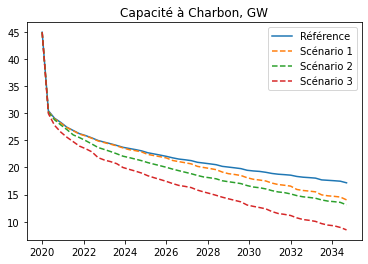

In [119]:
plt.plot(2020+T[:50],c_hist_0[:50],label='Référence')
plt.plot(2020+T[:50],c_hist_1[:50],'--',label='Scénario 1')
plt.plot(2020+T[:50],c_hist_2[:50],'--',label='Scénario 2')
plt.plot(2020+T[:50],c_hist_3[:50],'--',label='Scénario 3')
plt.legend()
plt.title('Capacité à Charbon, GW')
plt.savefig('charbon_capacity.pdf',format='pdf')

In [81]:
ren_hist_0 = np.array([54.29895728 ,54.62287338 ,54.62487507 ,54.62677641 ,54.62863552 ,54.63047406
 ,54.63230168 ,54.63431039 ,54.6364361  ,54.63832747 ,54.64040409 ,54.64464107
 ,54.64935116 ,54.65130918 ,54.65447461 ,54.66498844 ,54.67118325 ,54.6738531
 ,54.67832514 ,54.68939955 ,54.69670801 ,54.69905071 ,54.7028043  ,54.71221576
 ,54.7163999  ,54.71881508 ,54.7215421  ,54.73154316 ,54.73443297 ,54.73654851
 ,54.73884903 ,54.74342335 ,54.74614303 ,54.74802877 ,54.75019764 ,54.75296846
 ,54.75514163 ,54.75700495 ,54.75892252 ,54.7615697  ,54.76355688 ,54.76537825
 ,54.76725119 ,54.76959231 ,54.77163217 ,54.77345768 ,54.7753721  ,54.7778636
 ,54.77983475 ,54.78165942 ,54.78356737 ,54.78665755 ,54.78876393 ,54.79061779
 ,54.79262768 ,54.79661115 ,54.79894001 ,54.80084112 ,54.80301911 ,54.80663546
 ,54.80961039 ,54.81149025 ,54.81361837 ,54.81868719 ,54.82132195 ,54.82319344
 ,54.82529211 ,54.832599   ,54.83570796 ,54.83763183 ,54.83993291 ,54.84634707
 ,54.85080596 ,54.85283129 ,54.85548742 ,54.86426026 ,54.8679272  ,54.86991934
 ,54.87249549, 54.88904954, 54.89335698, 54.89537513, 54.8977649 , 54.92465615
 ,54.93759516 ,54.93909527 ,54.94454462 ,55.03335769 ,55.07699364 ,55.07913274
 ,55.08833195 ,55.49295196 ,55.60763765 ,55.61398393 ,55.63714009 ,56.82695171
 ,57.09545931 ,57.11750469 ,57.20661637 ,59.3201992  ,62.18599181])

In [82]:
ren_hist_1 = np.array([54.29895728, 54.62290002, 54.62508289, 54.63171936, 54.63812611, 54.64057973
 ,54.6463971  ,54.67696691 ,54.68994189 ,54.69433907 ,54.70342175 ,54.75919194
 ,54.79609726 ,54.79966395 ,54.81259002 ,54.94214324 ,54.99930775 ,55.01505073
 ,55.04836438 ,55.24052981 ,55.34554638 ,55.37698757 ,55.45728091 ,55.70855167
 ,55.85960926 ,55.90984909 ,56.0331174  ,56.41673111 ,56.65072282 ,56.69211441
 ,56.82871029 ,57.43169927 ,57.71456229 ,57.78108052 ,57.88447431 ,58.43759797
 ,58.77142187 ,58.83116346 ,59.02630667 ,59.83008383 ,60.07370021 ,60.16791681
 ,60.32910187 ,61.08546992 ,61.31883837 ,61.42294292 ,61.56878004 ,62.30037862
 ,62.52456033 ,62.62789564 ,62.76677691 ,63.46348584 ,63.68061379 ,63.78014487
 ,63.91450521 ,64.58185022 ,64.79054279 ,64.83721851 ,64.98875965 ,65.63234471
 ,65.83085772 ,65.87348768 ,66.02178773 ,66.64001997 ,66.83080278 ,66.87222231
 ,67.00348721 ,67.57584689 ,67.77010954 ,67.80966246 ,67.88565895 ,68.50936904
 ,68.69285346 ,68.71713743 ,68.78649925 ,69.38927524 ,69.57220921 ,69.58957771
 ,69.66022647 ,70.29895705 ,70.47335609 ,70.50333225, 70.56529579, 71.20772028
 ,71.52586792 ,71.55572323 ,71.66420806 ,72.64453491 ,72.90849443 ,72.9347985
 ,73.03678686 ,74.34789357 ,74.77714327 ,74.8152475  ,74.89451873 ,77.09786221
 ,77.60320399 ,77.63065395 ,77.7447414  ,81.55306421 ,86.07118555])

In [83]:
ren_hist_2 = np.array([54.29895728 ,54.62287188 ,54.62487313 ,54.62696739 ,54.62954555 ,54.63154599
 ,54.63387568 ,54.63968543 ,54.64596082 ,54.64838542 ,54.65413797 ,54.68402316
 ,54.6966456  ,54.70087348 ,54.7093604  ,54.75636267 ,54.77465767 ,54.77866953
 ,54.78722391 ,54.83279053 ,54.85060061 ,54.85488804 ,54.86642281 ,54.91833453
 ,54.94057496 ,54.94529305 ,54.96089496 ,55.04037678 ,55.08390274 ,55.09522293
 ,55.11874559 ,55.25068804 ,55.31950475 ,55.34514803 ,55.38438793 ,55.51352417
 ,55.59302408 ,55.62202102 ,55.70084295 ,55.90059028 ,55.99829718 ,56.02401766
 ,56.1038388  ,56.30991406 ,56.43776218 ,56.48529778 ,56.55318655 ,56.88237403
 ,56.99075289 ,57.03484642 ,57.14022731 ,57.43981268 ,57.59280259 ,57.63197608
 ,57.74600332 ,58.0312541  ,58.21177334 ,58.24698158 ,58.34683525 ,58.62946139
 ,58.80608429 ,58.83903463 ,58.94485722 ,59.21308922 ,59.38674358 ,59.4186837
 ,59.51744808 ,59.78528331 ,59.92379359 ,59.95715952 ,60.0619599  ,60.32885509
 ,60.49599522 ,60.5277684  ,60.6001989  ,60.88009095 ,61.05310444 ,61.08447402
 ,61.18459931 ,61.63173498 ,61.78113857 ,61.80948643 ,61.9116453  ,62.40014526
 ,62.67396344 ,62.69753744 ,62.78982529 ,63.59434323 ,63.82052208 ,63.86020597
 ,64.00644819 ,65.24566771 ,65.58658815 ,65.61907408 ,65.72721376 ,67.64803243
 ,68.11633023 ,68.15840892 ,68.2480864  ,72.26517345 ,76.89524021])

In [84]:
ren_hist_3 = np.array([54.29895728, 54.62287231, 54.62489694, 54.62763745, 54.63056709, 54.63270719
 ,54.63541378 ,54.64769621 ,54.65409265 ,54.65679479 ,54.66136203 ,54.70110273
 ,54.71628662 ,54.72122516 ,54.7315139  ,54.81540625 ,54.83697842 ,54.84843668
 ,54.8647262  ,54.97870175 ,55.0350923  ,55.05187284 ,55.10337609 ,55.3445183
 ,55.48333775 ,55.53418386 ,55.60501434 ,55.97007003 ,56.0849354  ,56.1826925
 ,56.30685885 ,56.61163573 ,56.83111265 ,56.91732559 ,57.15186808 ,57.63360832
 ,57.94846286 ,58.07621105 ,58.25059581 ,58.68953029 ,59.00286875 ,59.13264503
 ,59.30343757 ,60.03341909 ,60.28065995 ,60.39725195 ,60.65545621 ,61.32390439
 ,61.55012713 ,61.65984294 ,61.8081947  ,62.51381678 ,62.89860731 ,62.98873757
 ,63.15909845 ,63.79152113 ,63.99696677 ,64.09870022 ,64.2349671  ,64.58010125
 ,64.84165011 ,64.89220805 ,65.05462675 ,65.40974258 ,65.64410724 ,65.69438933
 ,65.84063366 ,66.19711031 ,66.39911901 ,66.44946463 ,66.52541751 ,66.90977733
 ,67.03591354 ,67.06173749 ,67.15212257 ,67.51509039 ,67.64774279 ,67.67339632
 ,67.76019331 ,68.0285964  ,68.17762325 ,68.20201348 ,68.27989385 ,68.67757723
 ,68.81369588 ,68.83632118 ,68.89712622 ,69.35398019 ,69.51408434 ,69.53725723
 ,69.59690104 ,70.37920805 ,70.57960449 ,70.59742762 ,70.66331283 ,71.91276995
 ,72.21156976 ,72.2299052  ,72.2838058  ,76.39763443 ,80.18135502])

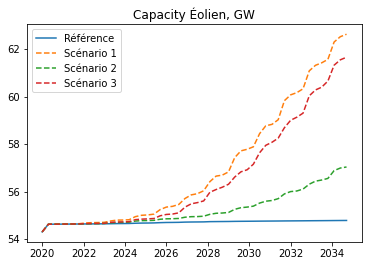

In [107]:
plt.plot(2020+T[:50],ren_hist_0[:50],label='Référence')
plt.plot(2020+T[:50],ren_hist_1[:50],'--',label='Scénario 1')
plt.plot(2020+T[:50],ren_hist_2[:50],'--',label='Scénario 2')
plt.plot(2020+T[:50],ren_hist_3[:50],'--',label='Scénario 3')
plt.legend()
plt.title('Capacity Éolien, GW')
plt.savefig('éolien_capacity.pdf',format='pdf')